In [41]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [86]:
import pandas as pd
df = pd.read_csv("titanic.csv")

In [87]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [90]:
#Removal of Duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [91]:
#Handling Missing Values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


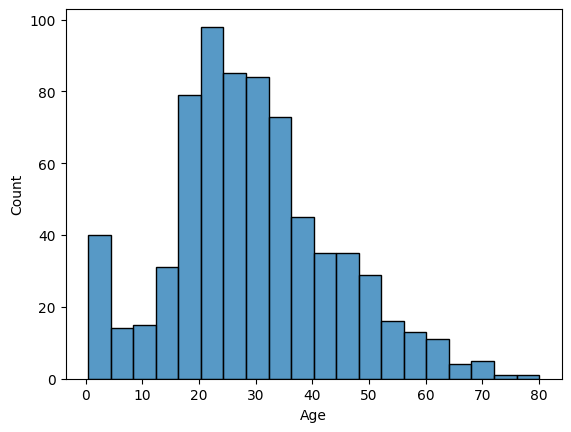

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a histplot
plot = sns.histplot(data=df, x="Age")
plt.show()

In [93]:
# Replace Missing values with Median
import numpy as np
df["Age"].replace(np.nan, df["Age"].median(), inplace=True)

/tmp/ipython-input-93-667576878.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].replace(np.nan, df["Age"].median(), inplace=True)


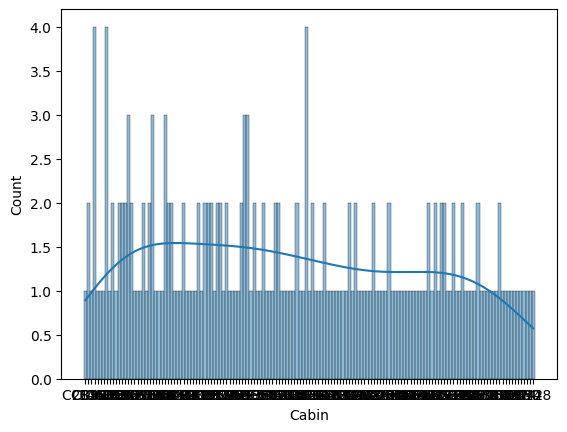

In [94]:
plot = sns.histplot(data=df, x="Cabin",kde=True)
plt.show()

In [95]:
df["Cabin"].replace(np.nan, df["Cabin"].mode()[0], inplace=True)
df = df.dropna(subset=['Embarked'])

/tmp/ipython-input-95-2383712572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Cabin"].replace(np.nan, df["Cabin"].mode()[0], inplace=True)


In [96]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [97]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Identify numeric columns
numeric_cols = ['Survived', 'Pclass','Age','SibSp','Parch','Fare']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numeric columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display the scaled columns
print("DataFrame after Min-Max Scaling on numeric columns:")
display(df[numeric_cols].head())

DataFrame after Min-Max Scaling on numeric columns:


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,1.0,0.271174,0.125,0.0,0.014151
1,1.0,0.0,0.472229,0.125,0.0,0.139136
2,1.0,1.0,0.321438,0.000,0.0,0.015469
3,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.0,1.0,0.434531,0.000,0.0,0.015713


In [98]:
# Measures of central tendency and dispersion for numerical columns
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,0.655793,0.363096,0.065523,0.063742,0.062649
std,256.998173,0.486260,0.417350,0.163168,0.137963,0.134460,0.097003
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412
50%,446.000000,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,668.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
#Or Use these functions
df_numeric = df.select_dtypes(include=['number'])
df_numeric.std() #Standard Deviation

,0
PassengerId,256.998173
Survived,0.486260
Pclass,0.417350
Age,0.163168
SibSp,0.137963
Parch,0.134460
Fare,0.097003


In [102]:
df_numeric.var() #Variance

,0
PassengerId,66048.060811
Survived,0.236448
Pclass,0.174181
Age,0.026624
SibSp,0.019034
Parch,0.018080
Fare,0.009410
